## 1. Notebook Initialization

In [6]:
import pandas as pd
import seaborn as sbn
import matplotlib.pyplot as plt
import numpy as np
import datetime as dt
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MaxAbsScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from random import randint

In [7]:
# Opciones de pandas
rows, cols = 400, 100
pd.set_option("display.max.columns", cols)
pd.set_option("display.max.rows", rows)
# Rutas
PATH = "../../data/fundamental_data/"

## 2. Model testing settings

In [8]:
from lib.fundamental_lib import make_dict
datas = make_dict('{}_Manual_dataset.csv', PATH)

In [9]:
svr_dict = {}
rf_dict = {}
mlp_dict = {}

## 2.1 SVR Testing

In [10]:
from lib.fundamental_lib import model_results_revised_pred
#Results log
#Params={'C': 1, 'epsilon': 0.0005, 'gamma': 9e-05, 'kernel': 'linear'} #best
Params = {'kernel': 'linear', 'C': 1.8000000000000003, 'epsilon': 0.002}
svr = SVR(**Params)
for stock in ['NSC', 'GL', 'PEP', 'BDX', 'IBM']:
    svr_dict[stock] = model_results_revised_pred(datas[stock], svr, label=stock, scaling=True, graphs=False, metrics=False)

## 2.2 RF Testing

In [11]:
from lib.fundamental_lib import model_results_revised_pred
#Best Params
#Params={'max_depth': None, 'max_features': 'auto', 'min_samples_leaf': 3, 'n_estimators': 40, 'oob_score': False} #pre
Params={'bootstrap': True, 'n_jobs': -1, 'random_state': 2021, 'n_estimators': 49, 'min_samples_leaf': 3, 'max_features': 'auto', 'oob_score': True, 'max_depth': None}
rf = RandomForestRegressor(**Params)
models_dict = {}
for stock in ['NSC', 'GL', 'PEP', 'BDX', 'IBM']:
    data = pd.read_csv(PATH+'{}_Manual_dataset.csv'.format(stock), header=0, index_col=0, low_memory=False)
    data.sort_index(ascending=True, inplace=True)
    rf_dict[stock] = model_results_revised_pred(datas[stock], rf, label=stock, scaling=True, graphs=False, metrics=False)

## 2.3 MLP Testing

In [12]:
from lib.fundamental_lib import model_results_revised_pred
#Params={'activation': 'identity', 'hidden_layer_sizes': (3,), 'solver': 'adam'}
#mlp = MLPRegressor(random_state=2021, max_iter=100000, hidden_layer_sizes=(3,3,3), activation='identity', solver='lbfgs', alpha=0.000041, learning_rate='constant', learning_rate_init=0.0000000000000000000000000000000000001, batch_size=1)
#mlp = MLPRegressor(random_state=2021, max_iter=100000, hidden_layer_sizes=(3,), activation='relu', solver='lbfgs', alpha=0.0000435, learning_rate='invscaling', learning_rate_init=0.0246, batch_size=19)
#mlp = MLPRegressor(random_state=2021, max_iter=100000, hidden_layer_sizes=(3,3,3), activation='relu', solver='lbfgs', alpha=0.0000431, learning_rate='constant', learning_rate_init=0.0245, batch_size=1) #best
Params={'random_state': 2021, 'max_iter': 100000, 'hidden_layer_sizes': (3, 3, 3), 'activation': 'relu', 'solver': 'lbfgs', 'alpha': 4.31e-05, 'learning_rate': 'constant', 'learning_rate_init': 0.0245, 'batch_size': 'auto'}
mlp = MLPRegressor(**Params)
model_dict = {}
for stock in ['NSC', 'GL', 'PEP', 'BDX', 'IBM']:
    mlp_dict[stock] = model_results_revised_pred(datas[stock], mlp, label=stock, scaling=False, graphs=False, metrics=False)

## 3. Visualization

In [33]:
def multi_graph(stock):
    arr_len = len(svr_dict[stock][1])
    svr_arr = (svr_dict[stock][1],np.reshape(svr_dict[stock][2], (arr_len)))
    rf_arr = (rf_dict[stock][1],np.reshape(rf_dict[stock][2], (arr_len)))
    mlp_arr = (mlp_dict[stock][1],np.reshape(mlp_dict[stock][2], (arr_len)))
    
    fig1,ax1 = plt.subplots(figsize=(20,10))

    plt.plot(mlp_dict[stock][0][-30:], mlp_arr[0][-30:], color='#4A5ECF', label='MLP')
    plt.plot(svr_dict[stock][0][-30:], svr_arr[0][-30:], color='#7D6F1E', label='SVR')
    plt.plot(rf_dict[stock][0][-30:], rf_arr[0][-30:], color='#05B543', label='RF')
    plt.plot(svr_dict[stock][0][-30:], svr_arr[1][-30:], color='#992E74', label='Actual Price')

    #plt.axvline(x = train.index[-1], color='green', linewidth=2, linestyle='--')

    plt.grid(which='major', color='#cccccc', alpha=0.5)

    plt.legend(shadow=True)
    plt.title('Model Prediction Comparison for {} stock'.format(stock), family='DejaVu Sans', fontsize=12)
    plt.xlabel('Timeline', family='DejaVu Sans', fontsize=10)
    plt.ylabel('Stock Price Value', family='DejaVu Sans', fontsize=10)
    plt.xticks(rotation=45, fontsize=11)
    plt.show()

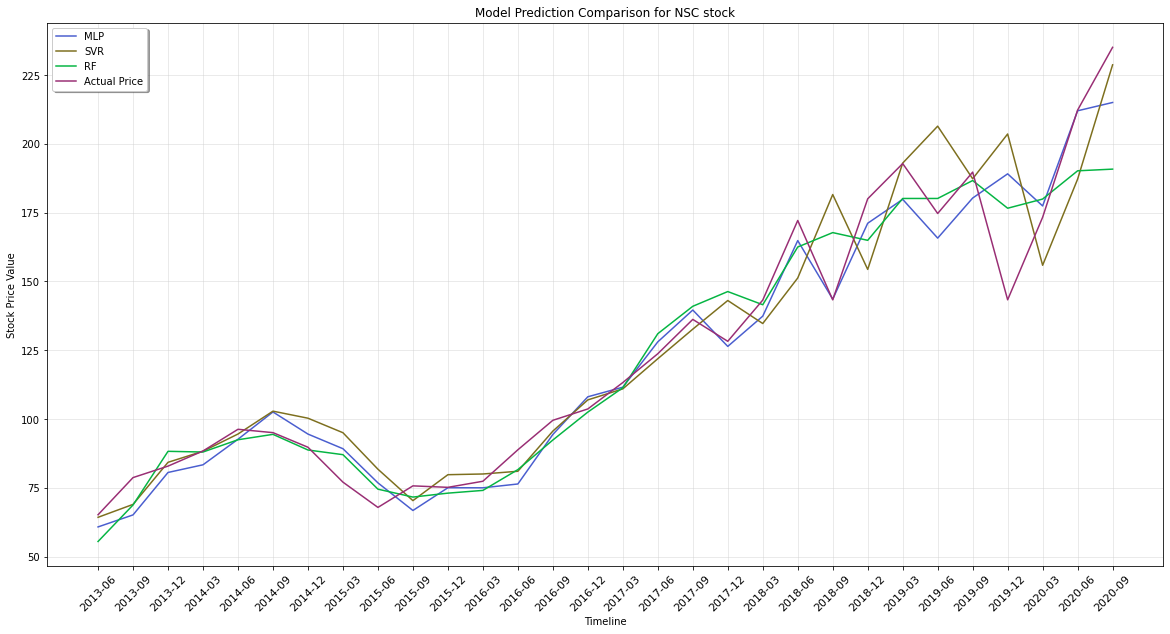

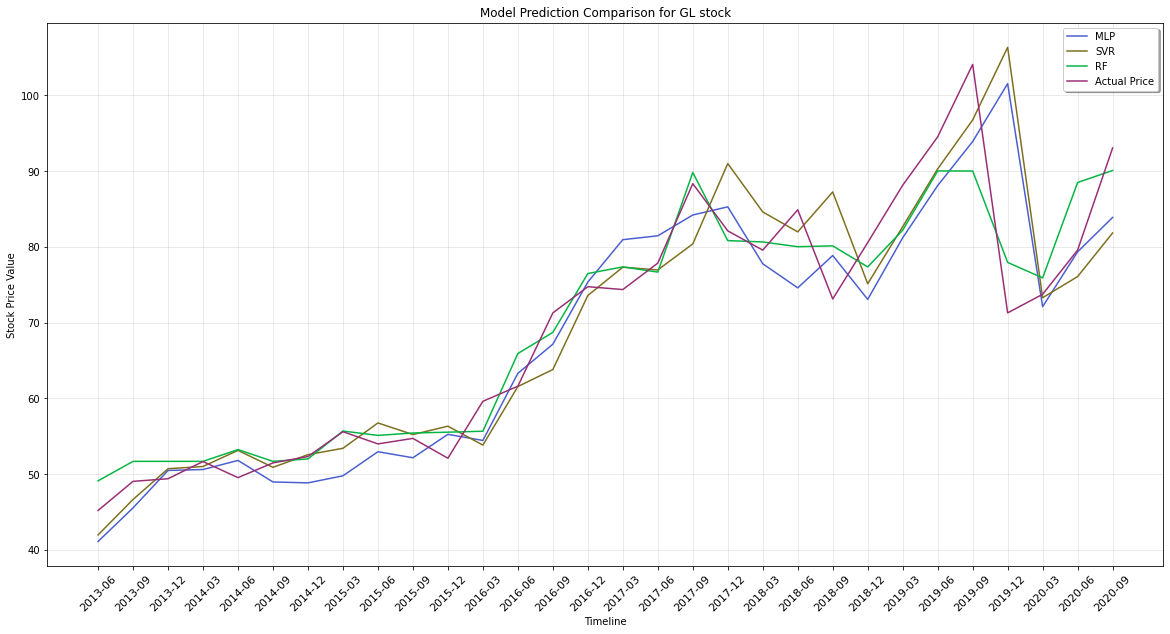

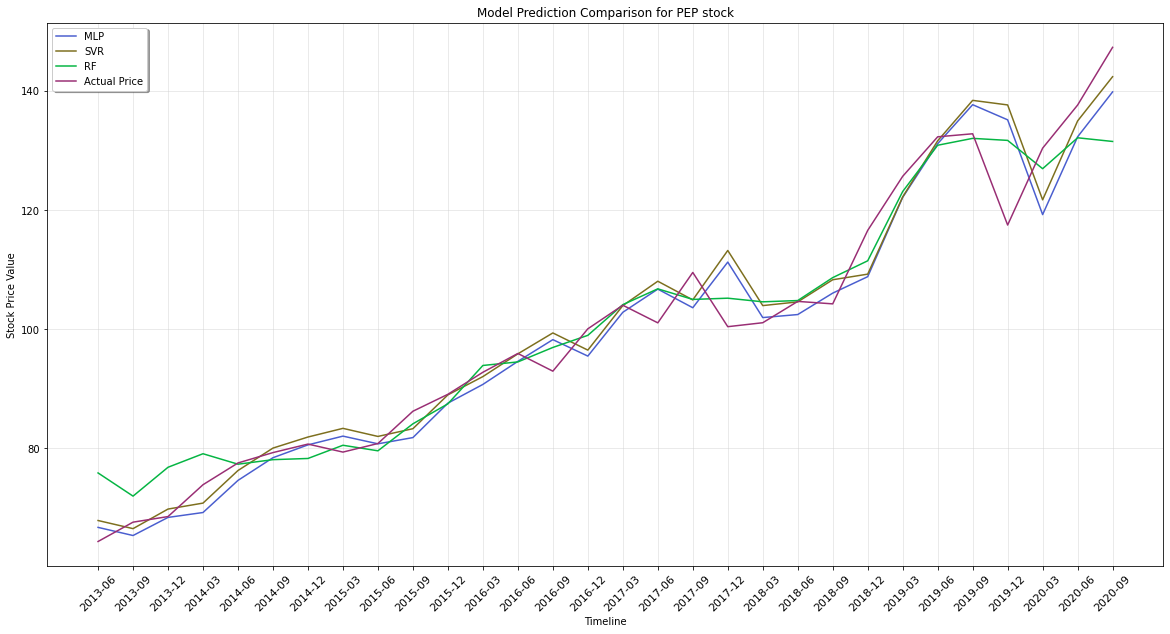

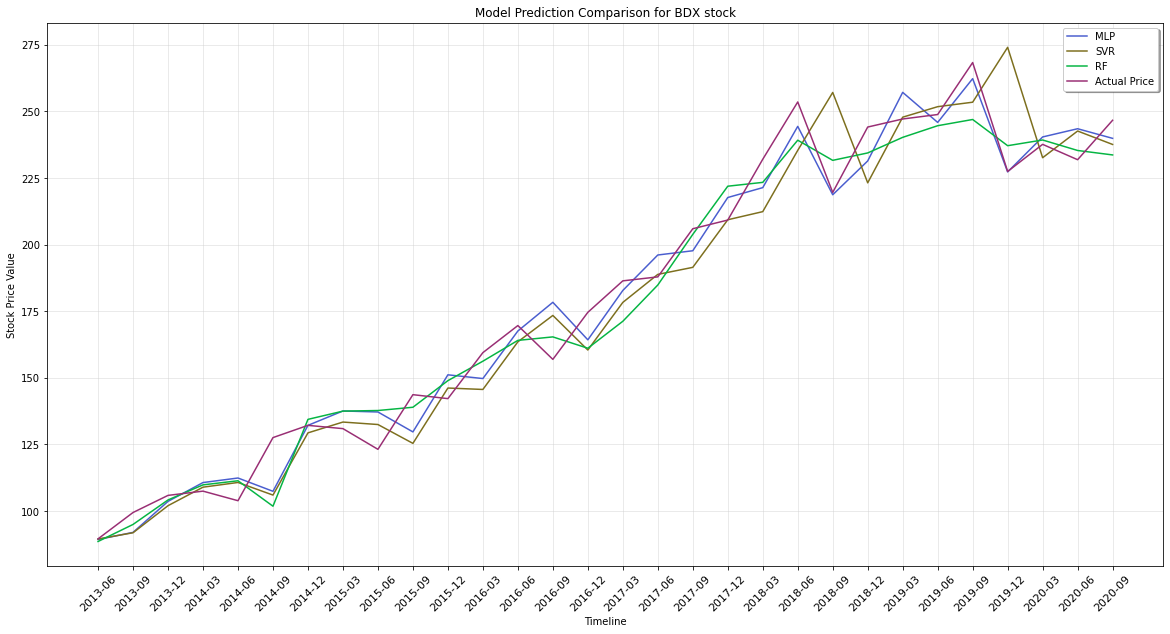

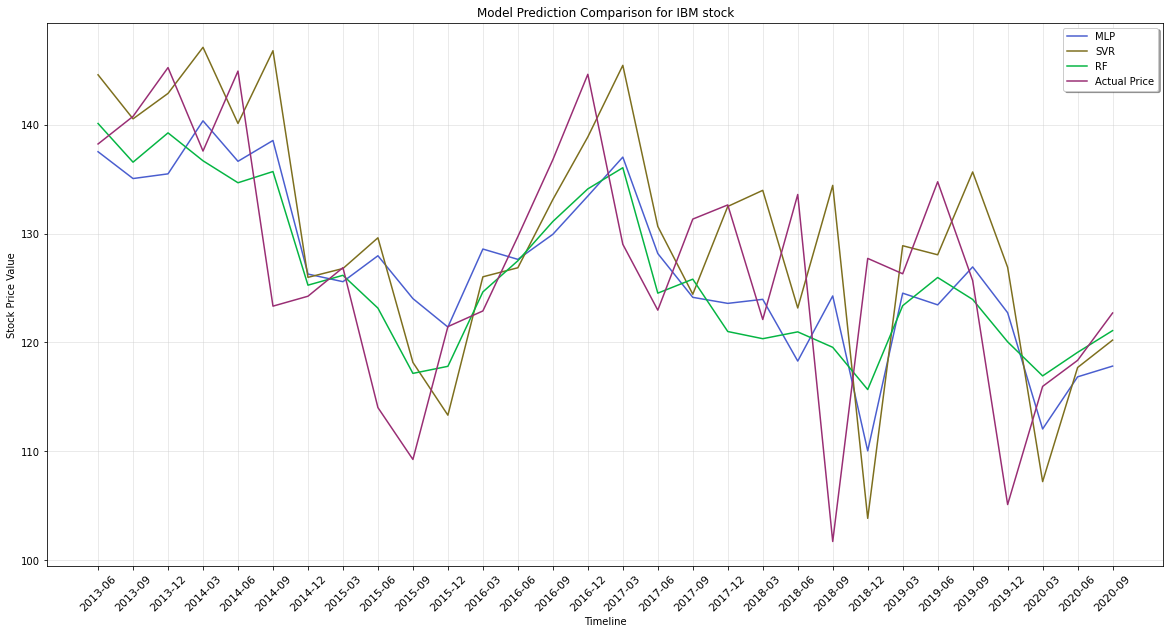

In [34]:
for stock in ['NSC', 'GL', 'PEP', 'BDX', 'IBM']:
    multi_graph(stock)